In [321]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# #1

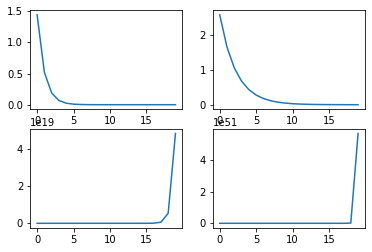

In [320]:
loop = 20
learning_rate = [0.2,0.9,2,10]

for i in range(len(learning_rate)):
    w = 2
    cost = np.zeros((loop,1))
    for j in range(loop):
        w = w - learning_rate[i]*2*w
        cost[j] = w*w
    plt.subplot(2,2,i+1)
    plt.plot(cost)

# #2

Dataset có 1 thuộc tính, đầu ra bài toán là 1 số thực, chọn model là đường thẳng $$ y = ax + b $$ với tiêu chí đi qua nhiều điểm dữ liệu nhất có thể.\
Giờ cần tìm bộ tham số (b,a) hay $ w =  \begin{bmatrix}w_{0} \\w_{1} \end{bmatrix} $ của model.
Xây dựng hàm loss dựa trên tổng độ lỗi của từng điểm dữ liệu: $$ L2 = \frac{1}{2N}\sum_{i=1}^{N} (\widehat{y}_{i} - y_{i})^2 $$ với $$ \widehat{y}_{i} = w_{0} + w_{1}x_{i} $$\
Cần tối ưu hàm loss L2 ở trên, ta tính đạo hàm L2 theo biến $ w $ \
Ta có: $$  \frac{dL2}{dw} = \begin{bmatrix}\frac{dL2}{dw_{0}} \\\frac{dL2}{dw_{1}} \end{bmatrix} = \begin{bmatrix}\frac{1}{N}\sum_{i=1}^{N} (\widehat{y}_{i} - y_{i}) \\\frac{1}{N}\sum_{i=1}^{N} (\widehat{y}_{i} - y_{i})x_{i} \end{bmatrix}  $$\
Đặt $$ X = \begin{bmatrix}1 \space \space x_{1} \\ 1 \space \space x_{2} \\ \vdots \space \space \vdots \\ 1 \space \space x_{n} \end{bmatrix}, \space Y = \begin{bmatrix} y_{1} \\y_{2} \\ \vdots \\ y_{n} \end{bmatrix}    $$ \
Khi đó: $$ \widehat{Y} = \begin{bmatrix} w_{0} + w_{1}x_{1} \\w_{0} + w_{1}x_{2} \\ \vdots \\ w_{0} + w_{1}x_{n} \end{bmatrix} = Xw $$ \
Suy ra: $$ \frac{dL2}{dw} = \frac{1}{N}{X}^{T}(\widehat{Y} - Y) $$ \
Hay: $$ \frac{dJ}{dw} = {X}^{T}(\widehat{Y} - Y) $$

# #3

Text(0, 0.5, 'loss')

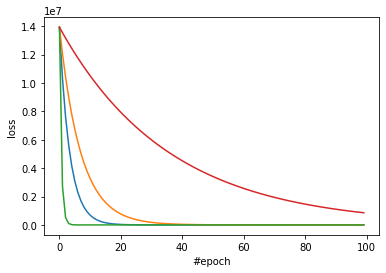

In [319]:
data = pd.read_csv('data_linear.csv').values

#N: số điểm dữ liệu, x cột 
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

#thêm cột 1 vào x
x = np.hstack((np.ones((N, 1)), x))

#tham số để training
numOfIteration = 100
cost = [[],[],[],[]]

# 4 learning_rate
learning_rate = [0.000001,0.0000005,0.000004,0.0000001]

#training
for i in range(len(learning_rate)):
    cost[i] = np.zeros((numOfIteration,1))
    w = np.array([0.,1.]).reshape(-1,1)
    for j in range(numOfIteration):
        r = np.dot(x, w) - y
        cost[i][j] = 0.5*np.sum(r*r)
        # correct the shape dimension
        w = w - learning_rate[i] * np.dot(x.T, r)
        #print('lr {}, step {}, cost: {}'.format(i, j, cost[i][j]))
    plt.plot(cost[i])
plt.xlabel('#epoch')
plt.ylabel('loss')

# #4

array([[  30.    , -100.    ],
       [  32.4138, -190.725 ],
       [  34.8276, -269.798 ],
       [  37.2414, -337.218 ],
       [  39.6552, -392.985 ],
       [  42.069 , -437.099 ],
       [  44.4828, -469.56  ],
       [  46.8966, -490.369 ],
       [  49.3103, -499.524 ],
       [  51.7241, -497.027 ],
       [  54.1379, -482.878 ],
       [  56.5517, -457.075 ],
       [  58.9655, -419.62  ],
       [  61.3793, -370.511 ],
       [  63.7931, -309.75  ],
       [  66.2069, -237.337 ],
       [  68.6207, -153.27  ],
       [  71.0345,  -57.5505],
       [  73.4483,   49.8216],
       [  75.8621,  168.847 ],
       [  78.2759,  299.524 ],
       [  80.6897,  441.855 ],
       [  83.1034,  595.838 ],
       [  85.5172,  761.474 ],
       [  87.931 ,  938.763 ],
       [  90.3448, 1127.71  ],
       [  92.7586, 1328.3   ],
       [  95.1724, 1540.55  ],
       [  97.5862, 1764.45  ],
       [ 100.    , 2000.    ]])

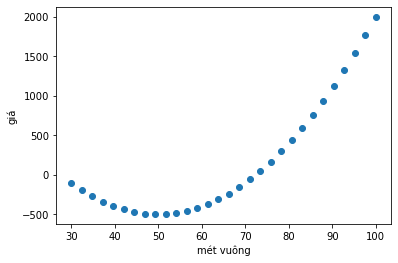

In [318]:
data = pd.read_csv('data_square.csv').values

N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
data

In [317]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
x = np.stack([x, np.square(x)], axis=-1)
x = x.reshape(x.shape[0], x.shape[-1])
#print(x)
x = np.hstack((np.ones((30,1)),x))

w = np.array([2000.,-100.,1.005]).reshape(-1,1)

numOfIteration = 100 
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000000001
for i in range(0, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    # correct the shape dimension
    w = w - learning_rate * np.dot(x.T, r)
    print('step {}, cost: {}'.format(i, cost[i]))

step 0, cost: [10971.03076274]
step 1, cost: [163.61885516]
step 2, cost: [2.44021038]
step 3, cost: [0.03643825]
step 4, cost: [0.00058908]
step 5, cost: [5.4434276e-05]
step 6, cost: [4.646071e-05]
step 7, cost: [4.63417599e-05]
step 8, cost: [4.63399513e-05]
step 9, cost: [4.63398898e-05]
step 10, cost: [4.63398542e-05]
step 11, cost: [4.63398191e-05]
step 12, cost: [4.6339784e-05]
step 13, cost: [4.63397489e-05]
step 14, cost: [4.63397138e-05]
step 15, cost: [4.63396787e-05]
step 16, cost: [4.63396435e-05]
step 17, cost: [4.63396084e-05]
step 18, cost: [4.63395733e-05]
step 19, cost: [4.63395382e-05]
step 20, cost: [4.63395031e-05]
step 21, cost: [4.6339468e-05]
step 22, cost: [4.63394329e-05]
step 23, cost: [4.63393977e-05]
step 24, cost: [4.63393626e-05]
step 25, cost: [4.63393275e-05]
step 26, cost: [4.63392924e-05]
step 27, cost: [4.63392573e-05]
step 28, cost: [4.63392222e-05]
step 29, cost: [4.63391871e-05]
step 30, cost: [4.6339152e-05]
step 31, cost: [4.63391168e-05]
step 3

[1999.9999992]
[-100.00006145]
[1.00000094]


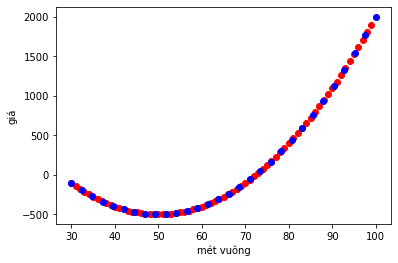

In [316]:
a = []
b = []
print(w[0])
print(w[1])
print(w[2])
for i in range(30,100,1):
    j = w[1] * i + w[2] * i * i + w[0]
    a.append(i)
    b.append(j)

plt.scatter(a, b, c='r')

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y, c='b')

plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.show()

# #5